<a href="https://colab.research.google.com/github/geekevgin/-Python/blob/main/MED_ML_HW_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
soybean_large = fetch_ucirepo(id=90)

# data (as pandas dataframes)
X = soybean_large.data.features
y = soybean_large.data.targets

# metadata
print(soybean_large.metadata)





{'uci_id': 90, 'name': 'Soybean (Large)', 'repository_url': 'https://archive.ics.uci.edu/dataset/90/soybean+large', 'data_url': 'https://archive.ics.uci.edu/static/public/90/data.csv', 'abstract': "Michalski's famous soybean disease database", 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 307, 'num_features': 35, 'feature_types': ['Categorical'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1980, 'last_updated': 'Sun Feb 11 2024', 'dataset_doi': '10.24432/C5JG6Z', 'creators': ['R.S. Michalski', 'R.L. Chilausky'], 'intro_paper': None, 'additional_info': {'summary': 'There are 19 classes, only the first 15 of which have been used in prior work. The folklore seems to be that the last four classes are unjustified by the data since they have so few examples. There are 35 categorical attributes, some nominal and some ordered.  The

In [3]:

import matplotlib.pyplot as plt
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt





In [4]:
# variable information
soybean_large.variables

,name,role,type,demographic,description,units,missing_values
0,class,Target,Categorical,None,"diaporthe-stem-canker, charcoal-rot, rhizocton...",None,no
1,date,Feature,Categorical,None,"april,may,june,july,august,september,october,?",None,yes
2,plant-stand,Feature,Categorical,None,"normal,lt-normal,?",None,yes
3,precip,Feature,Categorical,None,"lt-norm,norm,gt-norm,?",None,yes
4,temp,Feature,Categorical,None,"lt-norm,norm,gt-norm,?",None,yes
5,hail,Feature,Categorical,None,"yes,no,?",None,yes
6,crop-hist,Feature,Categorical,None,"diff-lst-year,same-lst-yr,same-lst-two-yrs,sam...",None,yes
7,area-damaged,Feature,Categorical,None,"scattered,low-areas,upper-areas,whole-field,?",None,yes
8,severity,Feature,Categorical,None,"minor,pot-severe,severe,?",None,yes
9,seed-tmt,Feature,Categorical,None,"none,fungicide,other,?",None,yes


In [5]:
# цель поставить возможный диагноз при заболевании соевых бобов, возможно регулируя так их урожайность, раннее лечение

In [6]:
# данные в датасете являются категориальными, целевая переменная явлется class, которая показывается различные заболевания

In [7]:
# задача классификации

In [8]:
len(X), len(y)

(307, 307)

In [9]:
X.isnull().sum()

date                1
plant-stand         8
precip             11
temp                7
hail               41
crop-hist           1
area-damaged        1
severity           41
seed-tmt           41
germination        36
plant-growth        1
leaves              0
leafspots-halo     25
leafspots-marg     25
leafspot-size      25
leaf-shread        26
leaf-malf          25
leaf-mild          30
stem                1
lodging            41
stem-cankers       11
canker-lesion      11
fruiting-bodies    35
external-decay     11
mycelium           11
int-discolor       11
sclerotia          11
fruit-pods         25
fruit-spots        35
seed               29
mold-growth        29
seed-discolor      35
seed-size          29
shriveling         35
roots               7
dtype: int64

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   date             306 non-null    float64
 1   plant-stand      299 non-null    float64
 2   precip           296 non-null    float64
 3   temp             300 non-null    float64
 4   hail             266 non-null    float64
 5   crop-hist        306 non-null    float64
 6   area-damaged     306 non-null    float64
 7   severity         266 non-null    float64
 8   seed-tmt         266 non-null    float64
 9   germination      271 non-null    float64
 10  plant-growth     306 non-null    float64
 11  leaves           307 non-null    int64  
 12  leafspots-halo   282 non-null    float64
 13  leafspots-marg   282 non-null    float64
 14  leafspot-size    282 non-null    float64
 15  leaf-shread      281 non-null    float64
 16  leaf-malf        282 non-null    float64
 17  leaf-mild       

In [11]:
modes = X.mode()
modes

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,int-discolor,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
0,5.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Заменяем пустые значения модами
for column in X.columns:
    # Проверяем, есть ли пропущенные значения в колонке
    if X[column].isnull().any():
        # Заменяем пропущенные значения модой для этой колонки
        X[column] = X[column].fillna(X[column].mode()[0])




<ipython-input-12-9ee1e60a3c5d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[column] = X[column].fillna(X[column].mode()[0])


In [13]:
X.describe()

,date,plant-stand,precip,temp,hail,crop-hist,area-damaged,severity,seed-tmt,germination,...,int-discolor,sclerotia,fruit-pods,fruit-spots,seed,mold-growth,seed-discolor,seed-size,shriveling,roots
count,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,...,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000,307.000000
mean,3.534202,0.452769,1.592834,1.127036,0.179153,1.817590,1.631922,0.807818,0.475570,1.013029,...,0.130293,0.032573,0.504886,0.960912,0.166124,0.100977,0.091205,0.087948,0.052117,0.153094
std,1.711544,0.498577,0.705034,0.615820,0.384107,0.993089,1.077711,0.582033,0.617201,0.749614,...,0.423139,0.177807,0.937147,1.522737,0.372799,0.301790,0.288371,0.283681,0.222626,0.419323
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,2.000000,2.000000,0.000000,3.000000,3.000000,1.000000,1.000000,2.000000,...,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,6.000000,1.000000,2.000000,2.000000,1.000000,3.000000,3.000000,2.000000,2.000000,2.000000,...,2.000000,1.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


In [14]:
X.isnull().sum()

date               0
plant-stand        0
precip             0
temp               0
hail               0
crop-hist          0
area-damaged       0
severity           0
seed-tmt           0
germination        0
plant-growth       0
leaves             0
leafspots-halo     0
leafspots-marg     0
leafspot-size      0
leaf-shread        0
leaf-malf          0
leaf-mild          0
stem               0
lodging            0
stem-cankers       0
canker-lesion      0
fruiting-bodies    0
external-decay     0
mycelium           0
int-discolor       0
sclerotia          0
fruit-pods         0
fruit-spots        0
seed               0
mold-growth        0
seed-discolor      0
seed-size          0
shriveling         0
roots              0
dtype: int64

In [15]:
y['class'].value_counts()

# видно, что одних классов больше , других меньше, в дальнейшем это может приводить к выбору модели только одного типа заболевания
# посмотрим как поведет себя на моделях, метриках


class
frog-eye-leaf-spot             40
phytophthora-rot               40
alternarialeaf-spot            40
brown-spot                     40
brown-stem-rot                 20
anthracnose                    20
diaporthe-stem-canker          10
purple-seed-stain              10
phyllosticta-leaf-spot         10
bacterial-pustule              10
charcoal-rot                   10
bacterial-blight               10
downy-mildew                   10
powdery-mildew                 10
rhizoctonia-root-rot           10
diaporthe-pod-&-stem-blight     6
cyst-nematode                   6
herbicide-injury                4
2-4-d-injury                    1
Name: count, dtype: int64

In [16]:
for column in X:
    unique_vals = X[column].unique()
    print(f'Unique values from {column}:', sorted(unique_vals))


#посмотрим на уникальные значения и их частоты

Unique values from date: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0]
Unique values from plant-stand: [0.0, 1.0]
Unique values from precip: [0.0, 1.0, 2.0]
Unique values from temp: [0.0, 1.0, 2.0]
Unique values from hail: [0.0, 1.0]
Unique values from crop-hist: [0.0, 1.0, 2.0, 3.0]
Unique values from area-damaged: [0.0, 1.0, 2.0, 3.0]
Unique values from severity: [0.0, 1.0, 2.0]
Unique values from seed-tmt: [0.0, 1.0, 2.0]
Unique values from germination: [0.0, 1.0, 2.0]
Unique values from plant-growth: [0.0, 1.0]
Unique values from leaves: [0, 1]
Unique values from leafspots-halo: [0.0, 1.0, 2.0]
Unique values from leafspots-marg: [0.0, 1.0, 2.0]
Unique values from leafspot-size: [0.0, 1.0, 2.0]
Unique values from leaf-shread: [0.0, 1.0]
Unique values from leaf-malf: [0.0, 1.0]
Unique values from leaf-mild: [0.0, 1.0, 2.0]
Unique values from stem: [0.0, 1.0]
Unique values from lodging: [0.0, 1.0]
Unique values from stem-cankers: [0.0, 1.0, 2.0, 3.0]
Unique values from canker-lesion: [0.0, 1.0,

<ipython-input-17-9eea5db1bf92>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


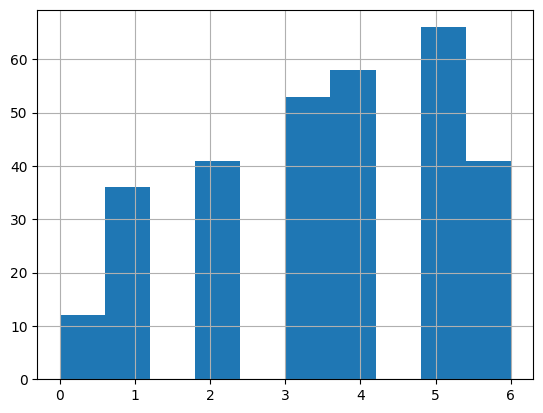

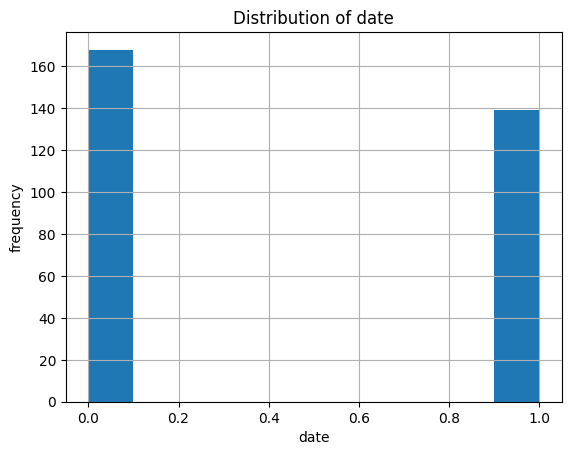

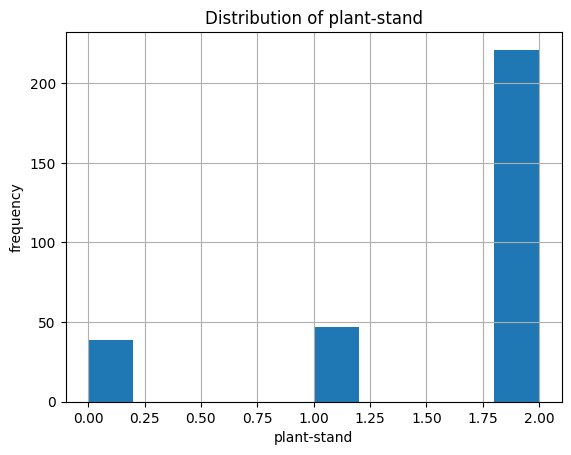

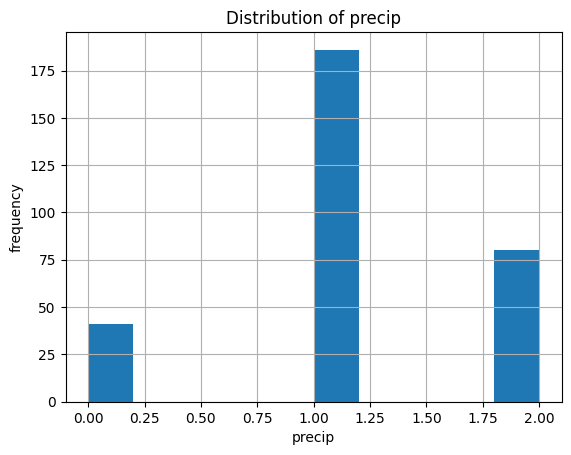

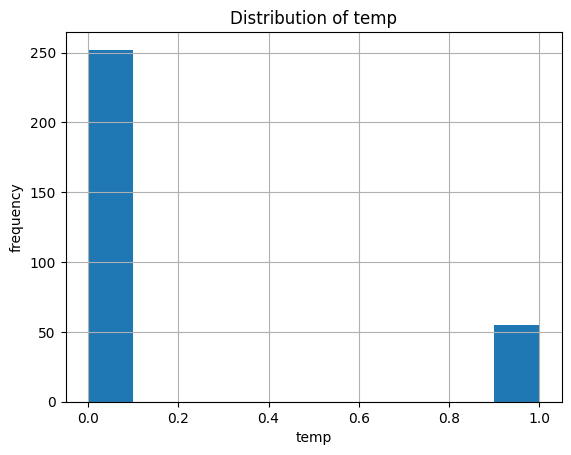

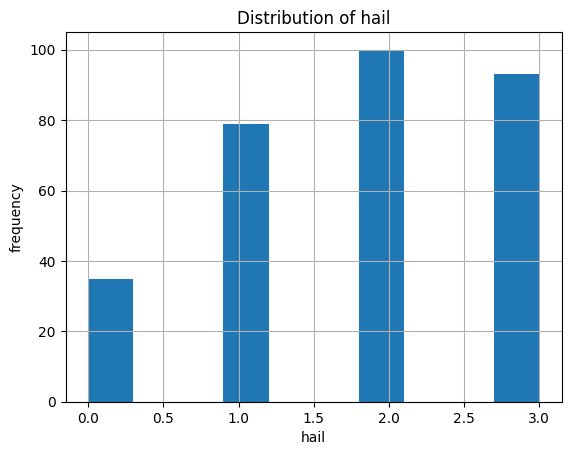

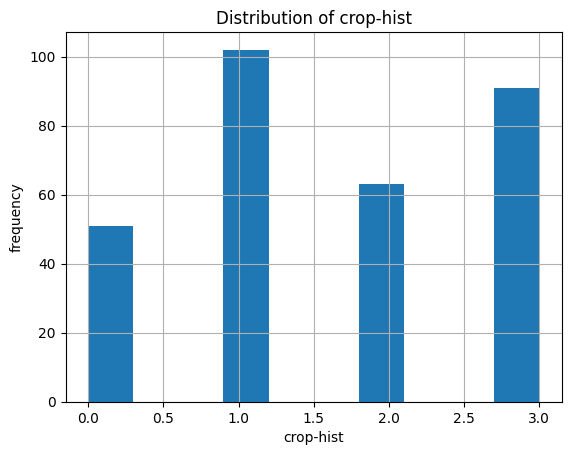

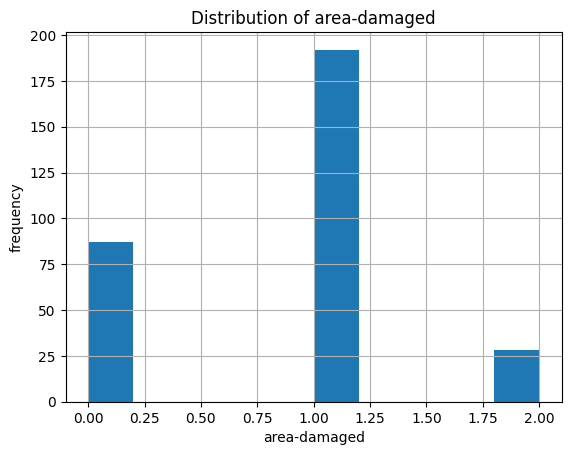

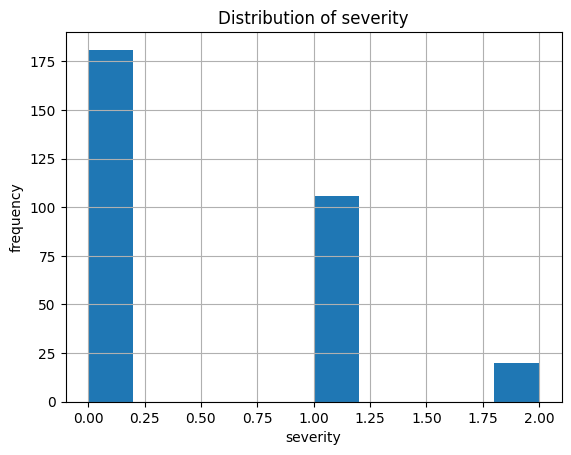

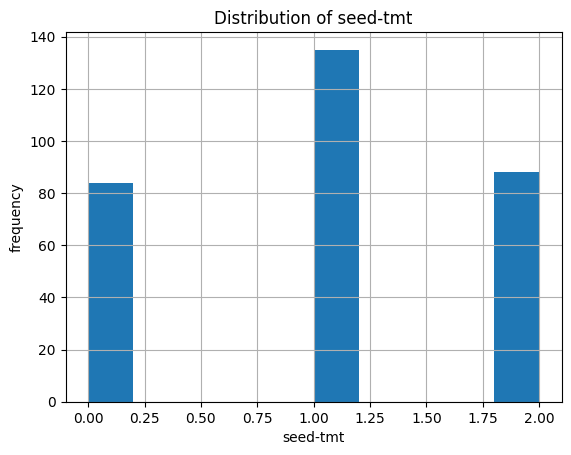

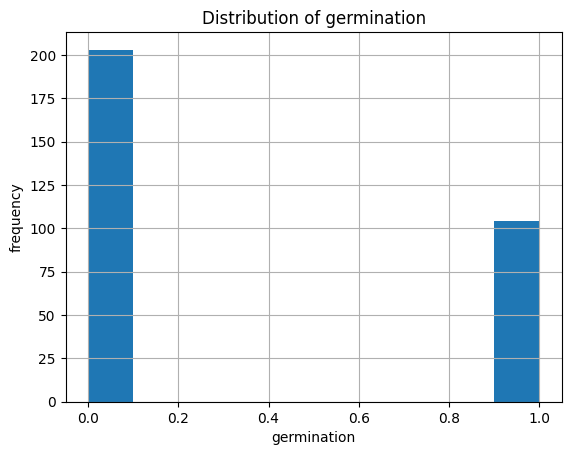

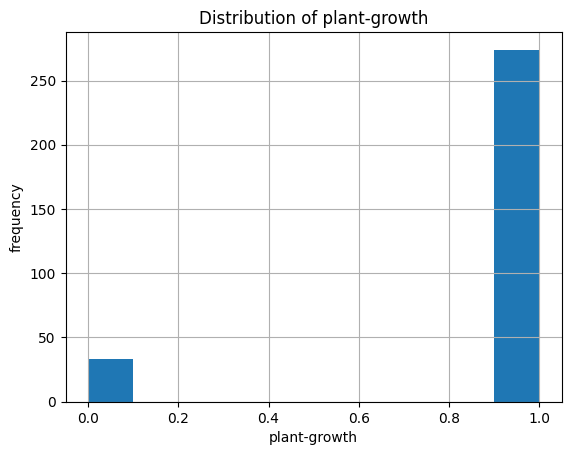

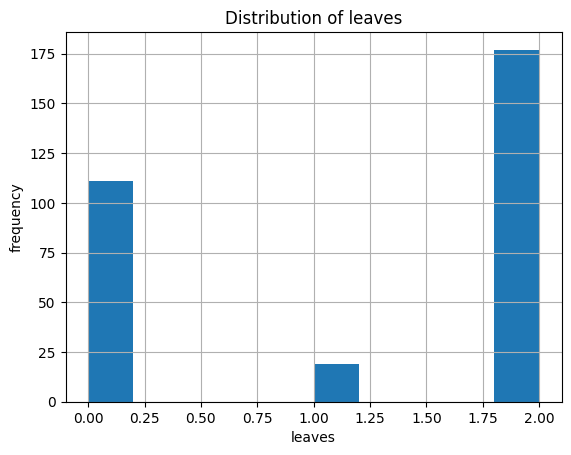

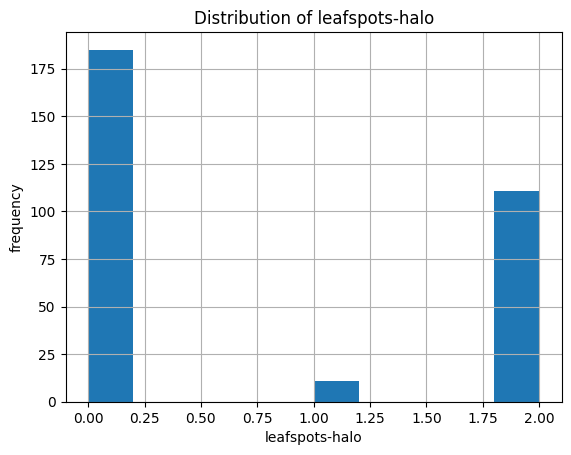

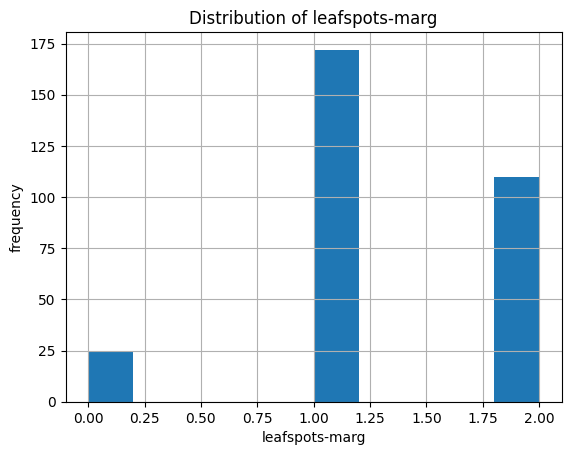

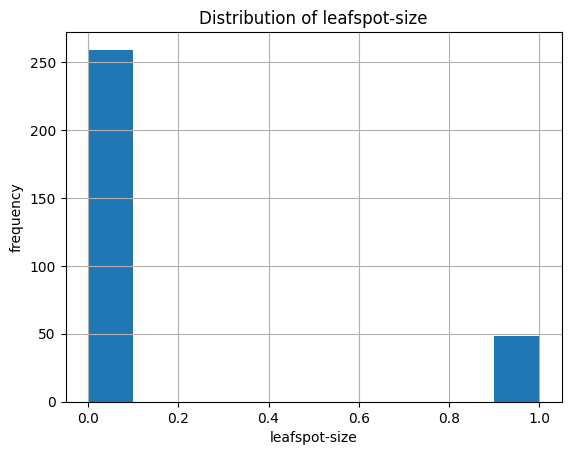

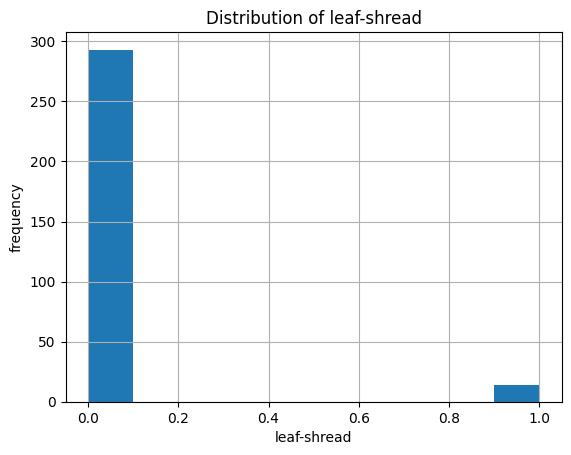

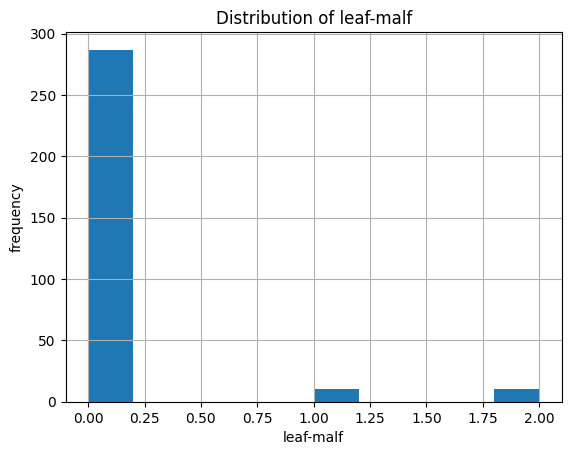

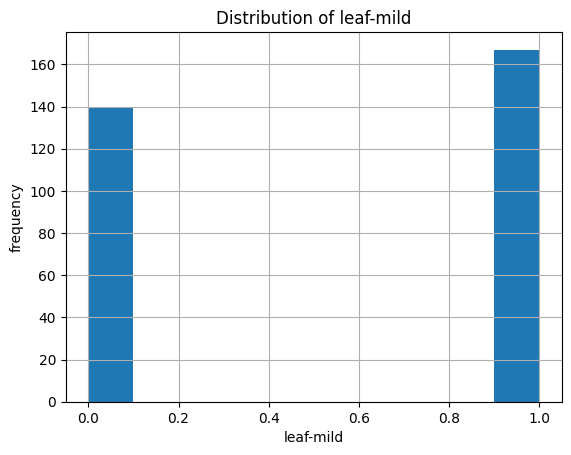

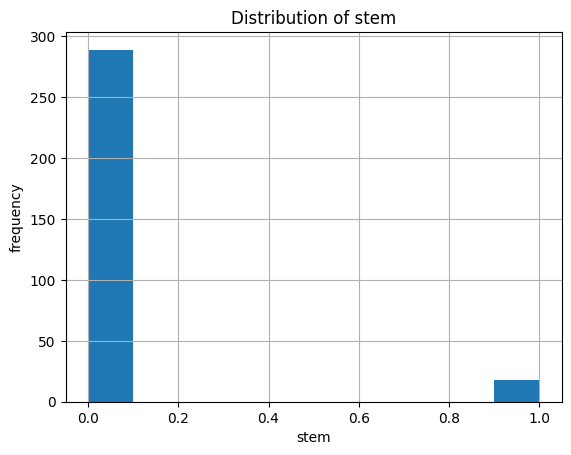

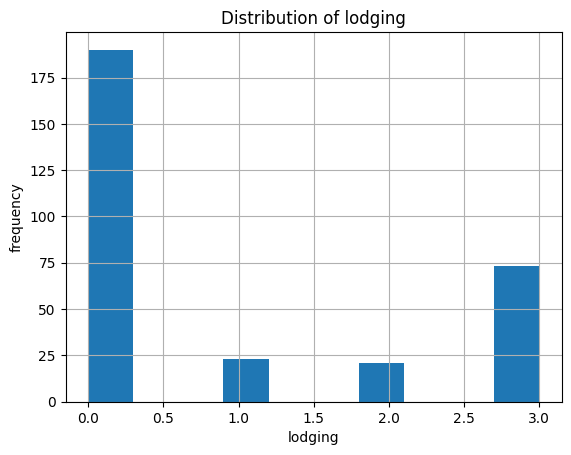

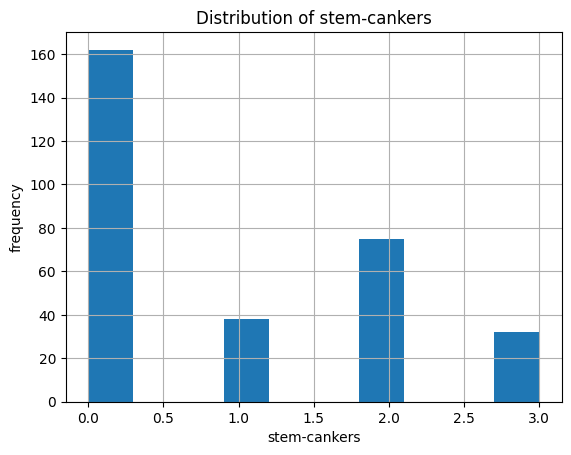

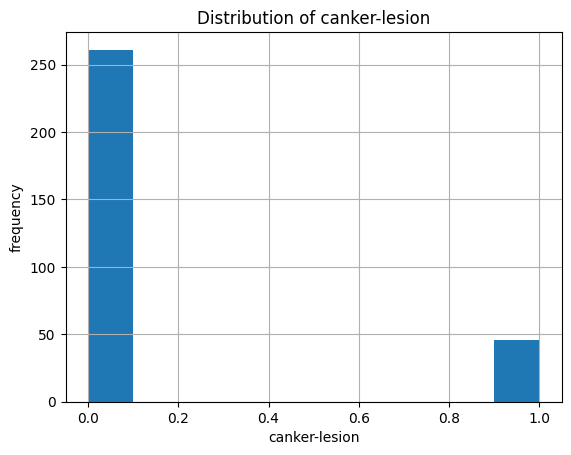

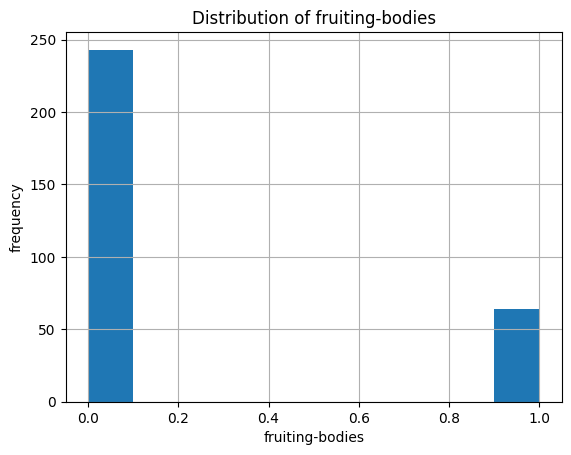

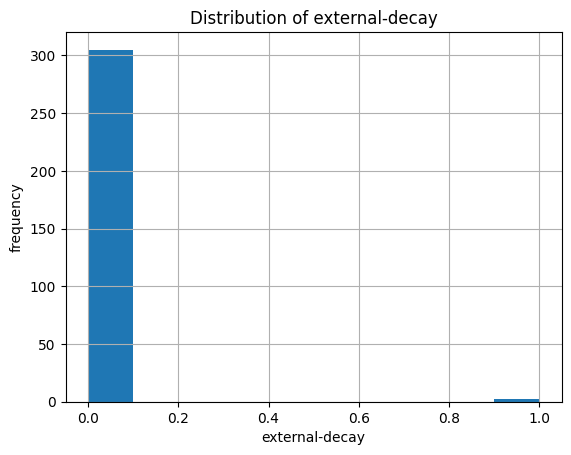

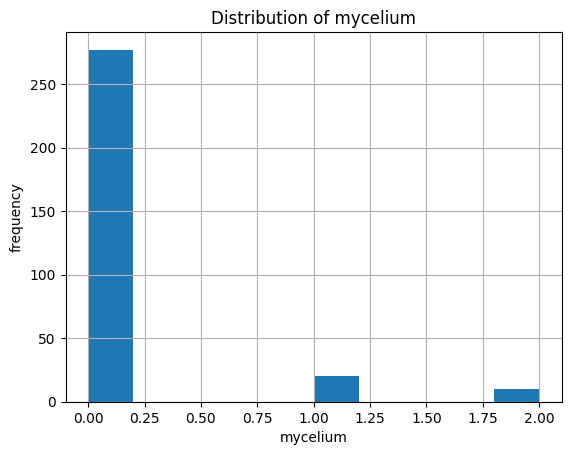

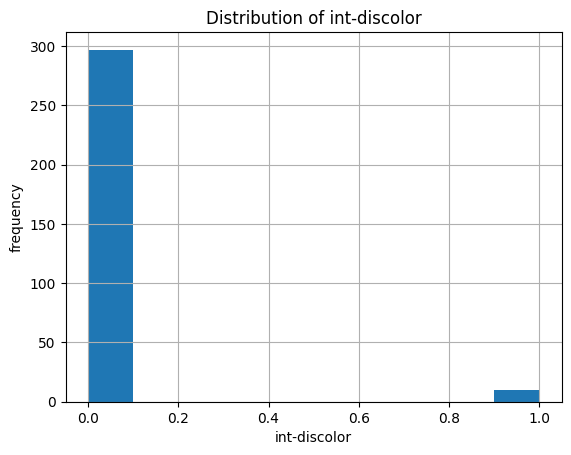

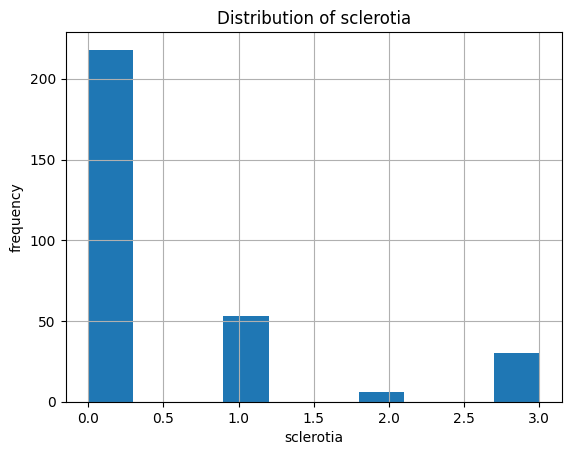

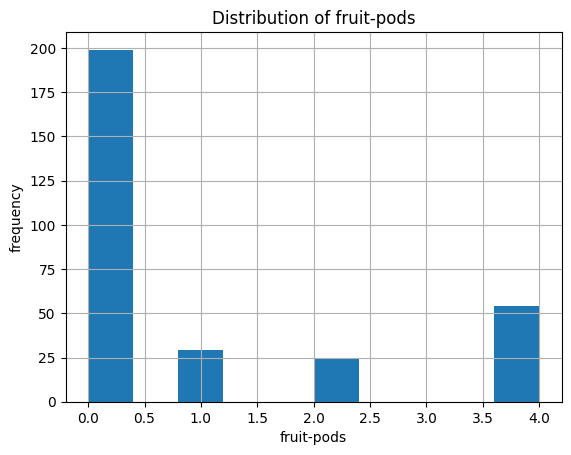

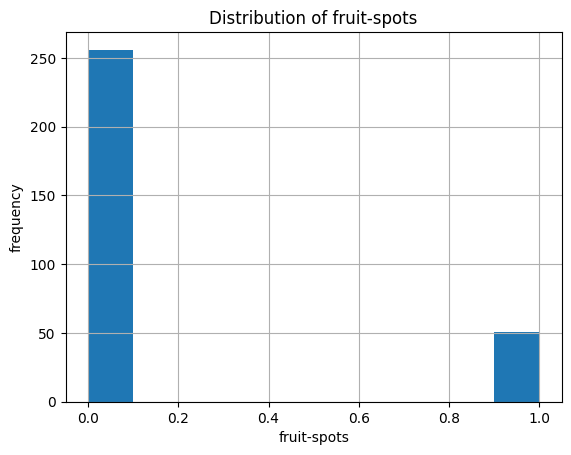

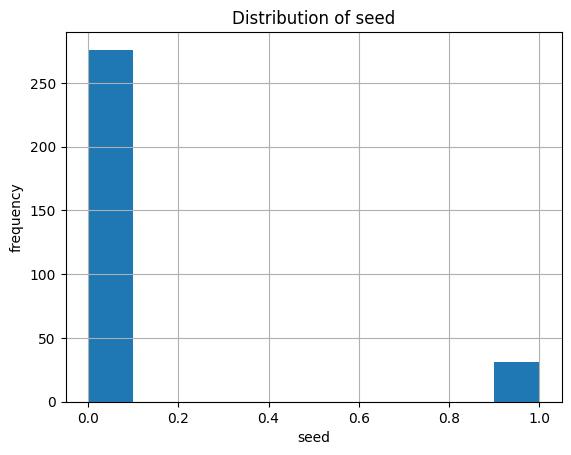

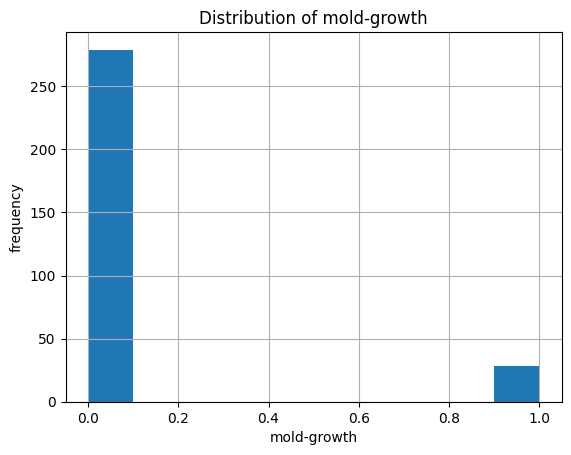

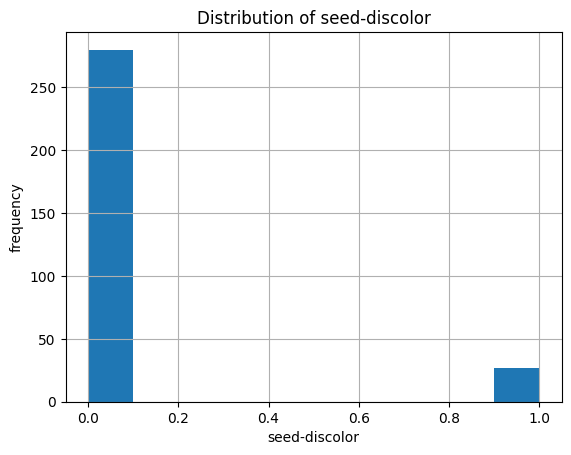

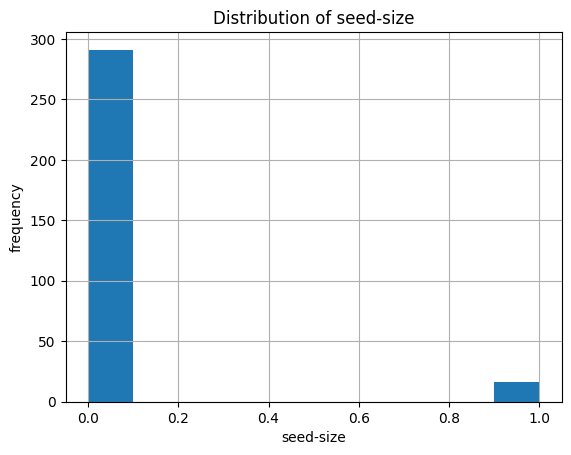

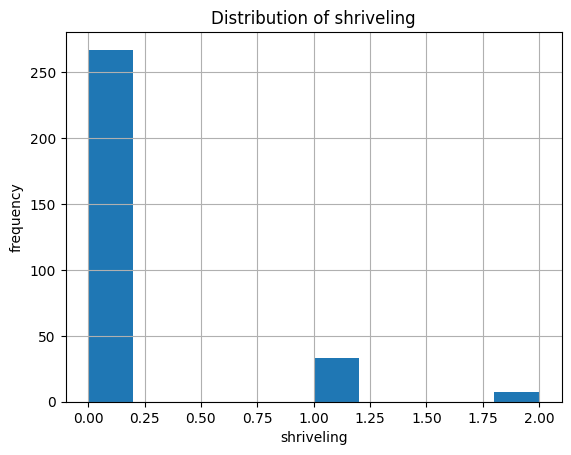

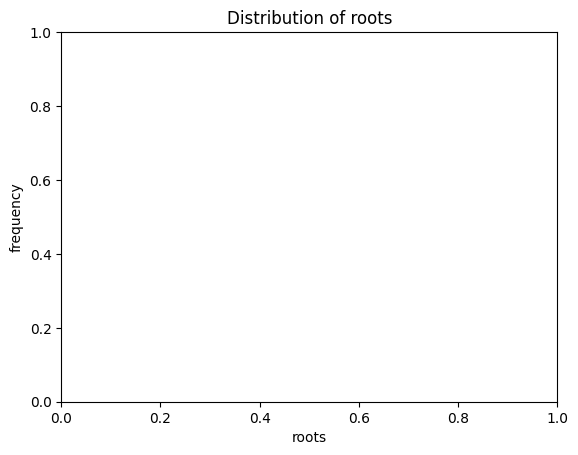

In [17]:
for column in X:
      X[column].hist()


      plt.figure()
      plt.xlabel(column)
      plt.ylabel('frequency')
      plt.title(f'Distribution of {column}')



In [18]:
X_train, X_test, y_train, y_test = train_test_split(X.drop('date', axis=1), y, test_size=0.2, random_state=42)
# разобьем на train и test

In [19]:
len(X_train), len(y_train), len(X_test), len(y_test)

(245, 245, 62, 62)

In [20]:
# k-Nearest Neighbors
# попробуем первую модель KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train.values.ravel())
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_knn

0.7741935483870968

In [21]:
# Random Forest
from sklearn.metrics import f1_score
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train.values.ravel())
y_pred_rf = rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)



f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

In [22]:
accuracy_rf # скор хороший, но помня про дисбаланс, возьмем еще f1 меру

0.9193548387096774

In [23]:
f1_rf # судя по скор модель работает с высокой точностью и полнотой

0.9044892067662467

In [24]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report






# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание и обучение модели логистической регрессии
logreg = LogisticRegression(C=1.0)
logreg.fit(X_train, y_train)

# Прогнозирование на тестовой выборке
y_pred = logreg.predict(X_test)

# Оценка модели
print(classification_report(y_test, y_pred))

                        precision    recall  f1-score   support

          2-4-d-injury       0.00      0.00      0.00         1
   alternarialeaf-spot       0.73      1.00      0.84         8
           anthracnose       1.00      0.80      0.89         5
      bacterial-blight       1.00      1.00      1.00         4
     bacterial-pustule       1.00      1.00      1.00         2
            brown-spot       0.89      1.00      0.94         8
        brown-stem-rot       1.00      0.83      0.91         6
          charcoal-rot       0.50      1.00      0.67         1
         cyst-nematode       1.00      1.00      1.00         2
 diaporthe-stem-canker       1.00      1.00      1.00         4
          downy-mildew       1.00      1.00      1.00         2
    frog-eye-leaf-spot       1.00      0.60      0.75         5
      herbicide-injury       1.00      1.00      1.00         1
phyllosticta-leaf-spot       0.00      0.00      0.00         1
      phytophthora-rot       0.88      

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` param

In [25]:
# две модели хорошо предсказывают RF и LOGREG

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95) # Уменьшаем размерность до 95% информации
X_pca = pca.fit_transform(X_train)

# Создание и обучение модели логистической регрессии
logreg_pca = LogisticRegression()
logreg_pca.fit(X_pca, y_train)

# Прогнозирование на тестовой выборке
y_pred_pca= logreg_pca.predict(pca.transform(X_test))

# Оценка модели
print(classification_report(y_test, y_pred_pca))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                        precision    recall  f1-score   support

          2-4-d-injury       0.00      0.00      0.00         1
   alternarialeaf-spot       0.73      1.00      0.84         8
           anthracnose       1.00      0.80      0.89         5
      bacterial-blight       1.00      0.50      0.67         4
     bacterial-pustule       1.00      1.00      1.00         2
            brown-spot       0.73      1.00      0.84         8
        brown-stem-rot       0.83      0.83      0.83         6
          charcoal-rot       0.50      1.00      0.67         1
         cyst-nematode       1.00      1.00      1.00         2
 diaporthe-stem-canker       1.00      1.00      1.00         4
          downy-mildew       1.00      1.00      1.00         2
    frog-eye-leaf-spot       1.00      0.60      0.75         5
      herbicide-injury       1.00      1.00      1.00         1
phyllosticta-leaf-spot       0.00      0.00      0.00         1
      phytophthora-rot       0.88      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
# данные метрик близки друг к другу

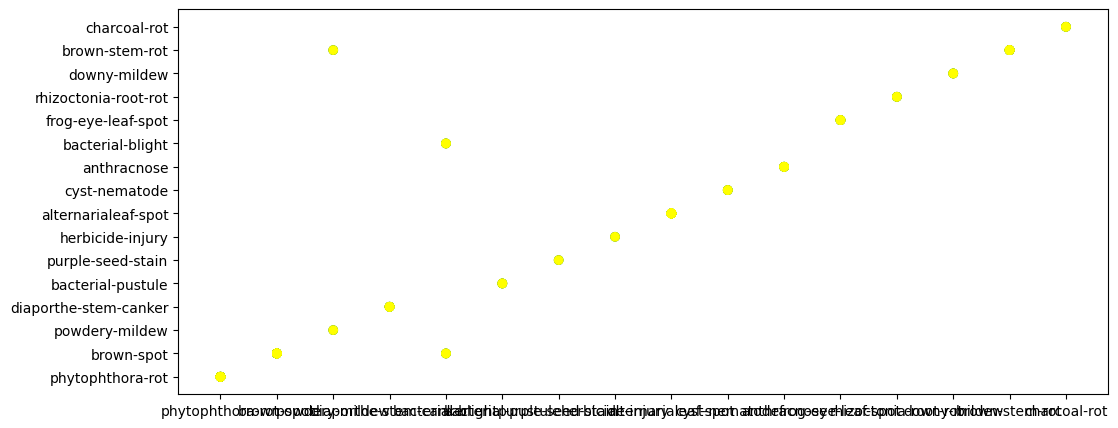

In [30]:
import matplotlib.pyplot as plt

# Задаем разные цвета для y_pred и y_pred_pca
colors = ['red' if ord(s[0]) < 0 else 'green' for s in y_pred]
col = ['blue' if ord(s[0]) < 0 else 'yellow' for s in y_pred_pca]

plt.figure(figsize=(12, 5))
plt.scatter(y_pred, y_pred_pca, c=colors)
plt.scatter(y_pred, y_pred_pca, c=col)
plt.show()

# точки накладываются друг на друга